In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client

from mccn.loader import stac_load_point
from mccn.extent import GeoBoxBuilder

ENDPOINT = "http://115.146.84.224:8082/"
client = pystac_client.Client.open(ENDPOINT)
collection = client.get_collection("vector_data")

In [2]:
point1 = collection.get_item("OZBarley1_measurement")
point2 = collection.get_item("OZBarley2_measurement")
points = [point1, point2]

In [3]:
gbox = GeoBoxBuilder.from_collection(collection, 100)
ds = stac_load_point(points, gbox)

/home/harry/WorkProjects/mccn-engine/.venv/lib/python3.11/site-packages/pandas/core/generic.py:3331: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xarray.Dataset.from_dataframe(self)
/home/harry/WorkProjects/mccn-engine/mccn/loader/point.py:182: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the D

In [4]:
ds

<xarray.Dataset> Size: 322kB
Dimensions:      (time: 1, y: 100, x: 100)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-09-05T23:55:00
    spatial_ref  int32 4B 4326
  * y            (y) float64 800B -35.05 -35.05 -35.05 ... -35.05 -35.05 -35.05
  * x            (x) float64 800B 147.3 147.3 147.3 147.3 ... 147.3 147.3 147.3
Data variables:
    Ca_Soln      (time, y, x) float64 80kB nan nan nan nan ... nan nan nan nan
    S            (time, y, x) float64 80kB nan nan nan nan ... nan nan nan nan
    Na_Soln      (time, y, x) float64 80kB nan nan nan nan ... nan nan nan nan
    pH           (time, y, x) float64 80kB nan nan nan nan ... nan nan nan nan

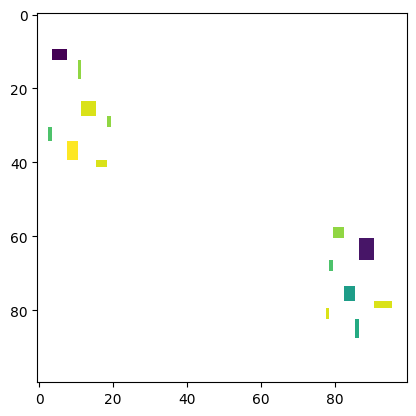

In [6]:
plt.imshow(ds.pH.values[0,:,:])
plt.show()